In [1]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt


Import the database from UCI

In [2]:
car_data = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"

In [10]:
columns = ["Buying Price", "Maintenance price", "doors", "persons", "Boot cap", "Safety", "Acceptability"]

In [11]:
car_df = pd.read_csv(car_data, header=None, names=columns)

In [15]:
car_df.head()

,Buying Price,Maintenance price,doors,persons,Boot cap,Safety,Acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [19]:
car_df = car_df.replace({"5more": 5, "more": 4})
car_df = car_df.replace({"vhigh": 4, "high": 3, "med": 2, "low": 1})
car_df = car_df.replace({"big": 3, "small": 1})
car_df = car_df.replace({"acc": 1, "unacc": 0, "good": 2, "vgood": 3})
car_df


,Buying Price,Maintenance price,doors,persons,Boot cap,Safety,Acceptability
0,4,4,2,2,1,1,0
1,4,4,2,2,1,2,0
2,4,4,2,2,1,3,0
3,4,4,2,2,2,1,0
4,4,4,2,2,2,2,0
...,...,...,...,...,...,...,...
1723,1,1,5,4,2,2,2
1724,1,1,5,4,2,3,3
1725,1,1,5,4,3,1,0
1726,1,1,5,4,3,2,2


In [24]:
car_df['Acceptability'].value_counts()

0    1210
1     384
2      69
3      65
Name: Acceptability, dtype: int64

In [31]:
X, y = car_df.iloc[:, :-1], car_df.iloc[:, -1]

In [36]:
X

,Buying Price,Maintenance price,doors,persons,Boot cap,Safety
0,4,4,2,2,1,1
1,4,4,2,2,1,2
2,4,4,2,2,1,3
3,4,4,2,2,2,1
4,4,4,2,2,2,2
...,...,...,...,...,...,...
1723,1,1,5,4,2,2
1724,1,1,5,4,2,3
1725,1,1,5,4,3,1
1726,1,1,5,4,3,2


In [37]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1723    2
1724    3
1725    0
1726    2
1727    3
Name: Acceptability, Length: 1728, dtype: int64

TypeError: 'value' must be an instance of str or bytes, not a int

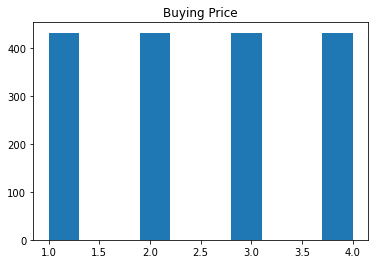

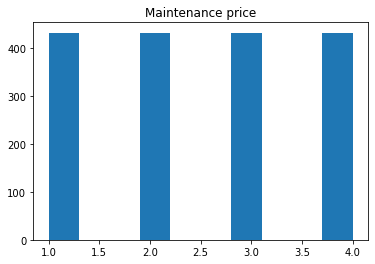

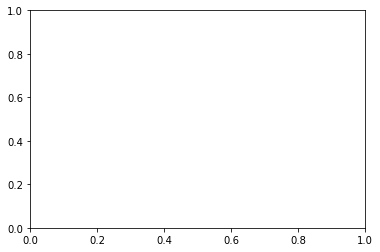

In [32]:
import matplotlib.pyplot as plt
for col_name in car_df.columns:
        plt.figure()
        plt.hist(car_df[col_name])
        plt.title(col_name)

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

In [52]:
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf = clf.fit(X_train, y_train)

[Text(0.375, 0.9166666666666666, 'Safety <= 1.5\ngini = 0.457\nsamples = 1209\nvalue = [847, 269, 44, 49]\nclass = acc'),
 Text(0.3125, 0.75, 'gini = 0.0\nsamples = 411\nvalue = [411, 0, 0, 0]\nclass = acc'),
 Text(0.4375, 0.75, 'persons <= 3.0\ngini = 0.581\nsamples = 798\nvalue = [436, 269, 44, 49]\nclass = acc'),
 Text(0.375, 0.5833333333333334, 'gini = 0.0\nsamples = 263\nvalue = [263, 0, 0, 0]\nclass = acc'),
 Text(0.5, 0.5833333333333334, 'Buying Price <= 2.5\ngini = 0.627\nsamples = 535\nvalue = [173, 269, 44, 49]\nclass = unacc'),
 Text(0.25, 0.4166666666666667, 'Maintenance price <= 2.5\ngini = 0.658\nsamples = 257\nvalue = [33, 131, 44, 49]\nclass = unacc'),
 Text(0.125, 0.25, 'Safety <= 2.5\ngini = 0.701\nsamples = 132\nvalue = [8, 39, 44, 41]\nclass = good'),
 Text(0.0625, 0.08333333333333333, 'gini = 0.55\nsamples = 62\nvalue = [4, 33, 25, 0]\nclass = unacc'),
 Text(0.1875, 0.08333333333333333, 'gini = 0.573\nsamples = 70\nvalue = [4, 6, 19, 41]\nclass = vgood'),
 Text(0.3

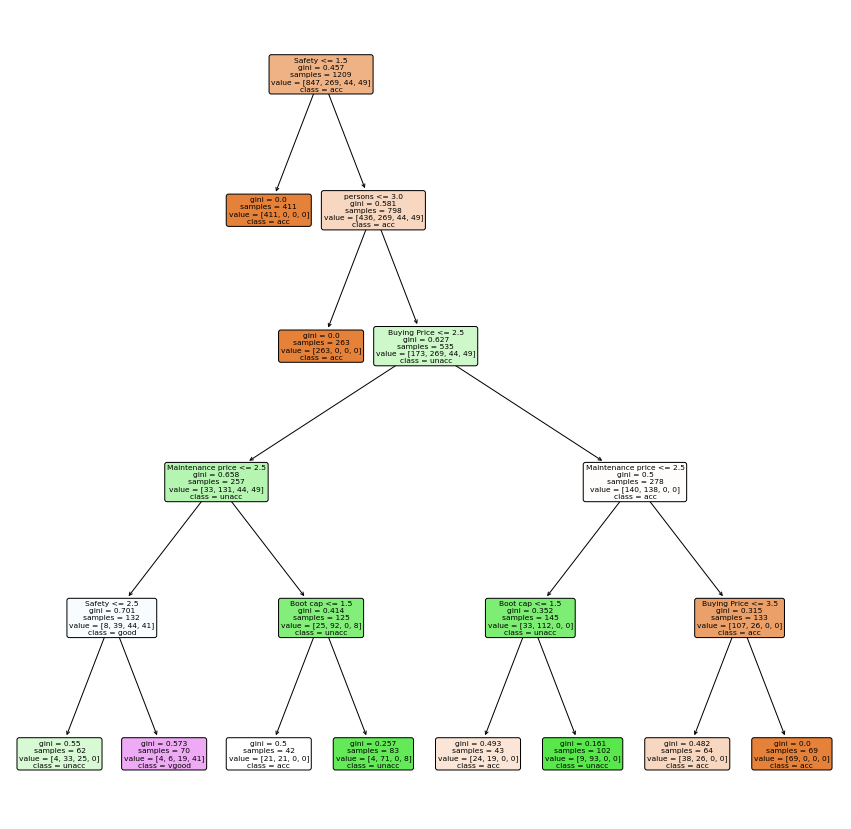

In [53]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 15))
plot_tree(clf,
          filled=True,
          rounded=True,
          class_names=["acc", "unacc", "good", "vgood"],
         feature_names=X.columns)

In [55]:
predictions = clf.predict(X_test)
predictions

array([1, 0, 0, 0, 0, 3, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 3, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       3, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 3, 0, 1, 1, 0, 0, 0, 3, 0, 3, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [57]:
(predictions == y_test).sum() / (len(y_test))

0.8554913294797688

In [58]:
clf_2 = DecisionTreeClassifier(max_depth=6, random_state=42)
clf_2 = clf_2.fit(X_train, y_train)

In [59]:
predictions1 = clf_2.predict(X_test)


In [60]:
(predictions1 == y_test).sum() / (len(y_test))

0.9229287090558767

In [61]:
clf_3 = DecisionTreeClassifier(max_depth=6, random_state=0)
clf_3 = clf_3.fit(X_train, y_train)

In [62]:
predictions3 = clf_3.predict(X_test)


In [63]:
(predictions3 == y_test).sum() / (len(y_test))

0.9229287090558767

In [67]:
clf_4 = DecisionTreeClassifier(max_depth=2, random_state=0, min_impurity_decrease=0.8)
clf_4 = clf_4.fit(X_train, y_train)

In [68]:
predictions4 = clf_4.predict(X_test)


In [69]:
(predictions4 == y_test).sum() / (len(y_test))

0.6994219653179191

In [70]:
clf_5 = DecisionTreeClassifier(max_depth=2, random_state=0, max_leaf_nodes=5)
clf_5 = clf_5.fit(X_train, y_train)

In [71]:
predictions5 = clf_5.predict(X_test)


In [72]:
(predictions5 == y_test).sum() / (len(y_test))

0.7726396917148363